In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [76]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(''), 'src', 'bench', 'results_clean.csv')
print(f"Path: {path_to_csv}")
df = pd.read_csv(path_to_csv)

df.head()

Path: /home/gromdimon/Working/auto-acmg/src/bench/results_clean.csv


,Variant,Expected Criteria,AutoACMG Criteria,AutoACMG Prediction time,AutoACMG True Positives,AutoACMG False Negatives,AutoACMG False Positives,Intervar Criteria,Intervar Prediction time,Intervar True Positives,Intervar False Negatives,Intervar False Positives,Comment,AutoACMG Full Response,Intervar Full Response
0,4-113568536-G-GA,PVS1,PVS1;PM1;PM2,3.329291,PVS1,PM1;PM2,NaN,NaN,0.0,NaN,NaN,NaN,Gene: LARP7,"{'pvs1': {'name': 'PVS1', 'prediction': <AutoA...",NaN
1,NM_004360.3:c.1085delT,PVS1,PVS1;PM1,1.597754,PVS1,PM1,NaN,NaN,0.0,NaN,NaN,NaN,Gene: CDH1; p.Val362GlyfsTer31; From Recommend...,"{'pvs1': {'name': 'PVS1', 'prediction': <AutoA...",NaN
2,NM_000152.4:c.525delT,PVS1,PVS1;PM1;PM2,1.649675,PVS1,PM1;PM2,NaN,NaN,0.0,NaN,NaN,NaN,Gene: GAA; p.Glu176ArgfsTer45; From Recommenda...,"{'pvs1': {'name': 'PVS1', 'prediction': <AutoA...",NaN
3,NM_000152.4:c.1987delC,PVS1,PVS1;PM1,1.531021,PVS1,PM1,NaN,NaN,0.0,NaN,NaN,NaN,Gene: GAA; p.Gln663SerfsTer33; From Recommenda...,"{'pvs1': {'name': 'PVS1', 'prediction': <AutoA...",NaN
4,NM_000152.4:c.2706delG,PVS1,PVS1;PM1,1.397128,PVS1,PM1,NaN,NaN,0.0,NaN,NaN,NaN,Gene: GAA; p.Lys903ArgfsTer2; From Recommendat...,"{'pvs1': {'name': 'PVS1', 'prediction': <AutoA...",NaN


In [77]:
# Replace NaN values with empty strings
df.fillna('', inplace=True)

# Convert time columns to numeric
df['AutoACMG Prediction time'] = pd.to_numeric(df['AutoACMG Prediction time'], errors='coerce')
df['Intervar Prediction time'] = pd.to_numeric(df['Intervar Prediction time'], errors='coerce')

# Calculate the ratios for AutoACMG and Intervar
df['AutoACMG True Positives Ratio'] = df['AutoACMG True Positives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)
df['AutoACMG False Negatives Ratio'] = df['AutoACMG False Negatives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)
df['AutoACMG False Positives Ratio'] = df['AutoACMG False Positives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)

df['Intervar True Positives Ratio'] = df['Intervar True Positives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)
df['Intervar False Negatives Ratio'] = df['Intervar False Negatives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)
df['Intervar False Positives Ratio'] = df['Intervar False Positives'].str.split(';').apply(len) / df['Expected Criteria'].str.split(';').apply(len)

In [23]:
# # Visualize Prediction Time
# plt.figure(figsize=(12, 6))
# plt.bar(df.index, df['AutoACMG Prediction time'], alpha=0.7, label='AutoACMG Prediction Time')
# plt.bar(df.index, df['Intervar Prediction time'], alpha=0.7, label='Intervar Prediction Time', bottom=df['AutoACMG Prediction time'])
# plt.xlabel('Variant Index')
# plt.ylabel('Prediction Time (s)')
# plt.title('Prediction Time Comparison')
# plt.legend()
# plt.show()

# # Visualize Ratios
# fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# axs[0].bar(df.index, df['AutoACMG True Positives Ratio'], alpha=0.7, label='AutoACMG True Positives Ratio')
# axs[0].bar(df.index, df['Intervar True Positives Ratio'], alpha=0.7, label='Intervar True Positives Ratio', bottom=df['AutoACMG True Positives Ratio'])
# axs[0].set_xlabel('Variant Index')
# axs[0].set_ylabel('True Positives Ratio')
# axs[0].set_title('True Positives Ratio Comparison')
# axs[0].legend()

# axs[1].bar(df.index, df['AutoACMG False Negatives Ratio'], alpha=0.7, label='AutoACMG False Negatives Ratio')
# axs[1].bar(df.index, df['Intervar False Negatives Ratio'], alpha=0.7, label='Intervar False Negatives Ratio', bottom=df['AutoACMG False Negatives Ratio'])
# axs[1].set_xlabel('Variant Index')
# axs[1].set_ylabel('False Negatives Ratio')
# axs[1].set_title('False Negatives Ratio Comparison')
# axs[1].legend()

# axs[2].bar(df.index, df['AutoACMG False Positives Ratio'], alpha=0.7, label='AutoACMG False Positives Ratio')
# axs[2].bar(df.index, df['Intervar False Positives Ratio'], alpha=0.7, label='Intervar False Positives Ratio', bottom=df['AutoACMG False Positives Ratio'])
# axs[2].set_xlabel('Variant Index')
# axs[2].set_ylabel('False Positives Ratio')
# axs[2].set_title('False Positives Ratio Comparison')
# axs[2].legend()

# plt.tight_layout()
# plt.show()


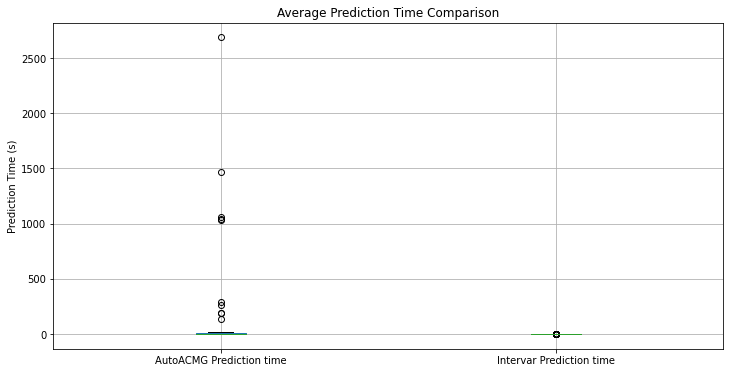

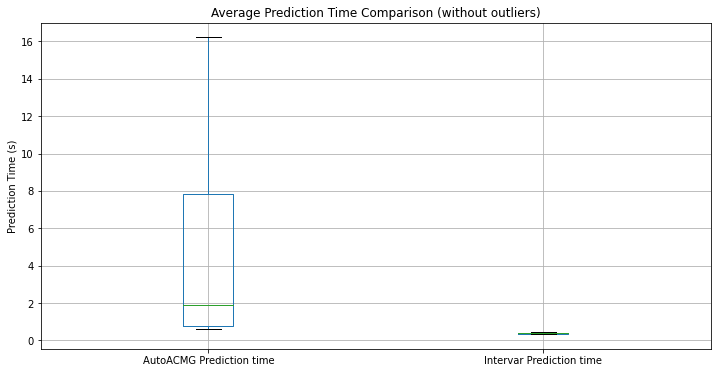

In [78]:
# Visualize Average Prediction Time in Boxplot
plt.figure(figsize=(12, 6))
df[['AutoACMG Prediction time', 'Intervar Prediction time']].boxplot()
plt.ylabel('Prediction Time (s)')
plt.title('Average Prediction Time Comparison')
plt.show()

# Visualize Average Prediction Time in Boxplot without outliers
plt.figure(figsize=(12, 6))
df[['AutoACMG Prediction time', 'Intervar Prediction time']].boxplot(showfliers=False)
plt.ylabel('Prediction Time (s)')
plt.title('Average Prediction Time Comparison (without outliers)')
plt.show()

In [84]:
# Calculate additional summary statistics
summary = {
    "Metric": [
        "Mean", "Standard Deviation", "Median", "Q1 (25th percentile)", "Q3 (75th percentile)", "IQR"
    ],
    "AutoACMG True Positives Ratio": [
        df["AutoACMG True Positives Ratio"].mean(),
        df["AutoACMG True Positives Ratio"].std(),
        df["AutoACMG True Positives Ratio"].median(),
        df["AutoACMG True Positives Ratio"].quantile(0.25),
        df["AutoACMG True Positives Ratio"].quantile(0.75),
        df["AutoACMG True Positives Ratio"].quantile(0.75) - df["AutoACMG True Positives Ratio"].quantile(0.25),
    ],
    "Intervar True Positives Ratio": [
        df["Intervar True Positives Ratio"].mean(),
        df["Intervar True Positives Ratio"].std(),
        df["Intervar True Positives Ratio"].median(),
        df["Intervar True Positives Ratio"].quantile(0.25),
        df["Intervar True Positives Ratio"].quantile(0.75),
        df["Intervar True Positives Ratio"].quantile(0.75) - df["Intervar True Positives Ratio"].quantile(0.25),
    ],
    "AutoACMG False Negatives Ratio": [
        df["AutoACMG False Negatives Ratio"].mean(),
        df["AutoACMG False Negatives Ratio"].std(),
        df["AutoACMG False Negatives Ratio"].median(),
        df["AutoACMG False Negatives Ratio"].quantile(0.25),
        df["AutoACMG False Negatives Ratio"].quantile(0.75),
        df["AutoACMG False Negatives Ratio"].quantile(0.75) - df["AutoACMG False Negatives Ratio"].quantile(0.25),
    ],
    "Intervar False Negatives Ratio": [
        df["Intervar False Negatives Ratio"].mean(),
        df["Intervar False Negatives Ratio"].std(),
        df["Intervar False Negatives Ratio"].median(),
        df["Intervar False Negatives Ratio"].quantile(0.25),
        df["Intervar False Negatives Ratio"].quantile(0.75),
        df["Intervar False Negatives Ratio"].quantile(0.75) - df["Intervar False Negatives Ratio"].quantile(0.25),
    ],
    "AutoACMG False Positives Ratio": [
        df["AutoACMG False Positives Ratio"].mean(),
        df["AutoACMG False Positives Ratio"].std(),
        df["AutoACMG False Positives Ratio"].median(),
        df["AutoACMG False Positives Ratio"].quantile(0.25),
        df["AutoACMG False Positives Ratio"].quantile(0.75),
        df["AutoACMG False Positives Ratio"].quantile(0.75) - df["AutoACMG False Positives Ratio"].quantile(0.25),
    ],
    "Intervar False Positives Ratio": [
        df["Intervar False Positives Ratio"].mean(),
        df["Intervar False Positives Ratio"].std(),
        df["Intervar False Positives Ratio"].median(),
        df["Intervar False Positives Ratio"].quantile(0.25),
        df["Intervar False Positives Ratio"].quantile(0.75),
        df["Intervar False Positives Ratio"].quantile(0.75) - df["Intervar False Positives Ratio"].quantile(0.25),
    ],
}

summary_df = pd.DataFrame(summary)

# Display summary statistics
display(summary_df)

# Export summary statistics to CSV
summary_df.to_csv("summary_statistics.csv", index=False)

,Metric,AutoACMG True Positives Ratio,Intervar True Positives Ratio,AutoACMG False Negatives Ratio,Intervar False Negatives Ratio,AutoACMG False Positives Ratio,Intervar False Positives Ratio
0,Mean,0.683195,0.529740,0.508120,0.620971,0.463146,0.721310
1,Standard Deviation,0.157648,0.260312,0.501176,0.233786,0.239276,0.609083
2,Median,0.666667,0.500000,0.333333,0.600000,0.400000,0.500000
3,Minimum,0.500000,0.166667,0.111111,0.200000,0.166667,0.111111
4,Maximum,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000
5,Range,0.500000,0.833333,2.888889,0.800000,0.833333,3.888889
6,Q1 (25th percentile),0.600000,0.333333,0.200000,0.500000,0.333333,0.333333
7,Q3 (75th percentile),0.750000,0.666667,0.600000,0.762500,0.500000,1.000000
8,IQR,0.150000,0.333333,0.400000,0.262500,0.166667,0.666667


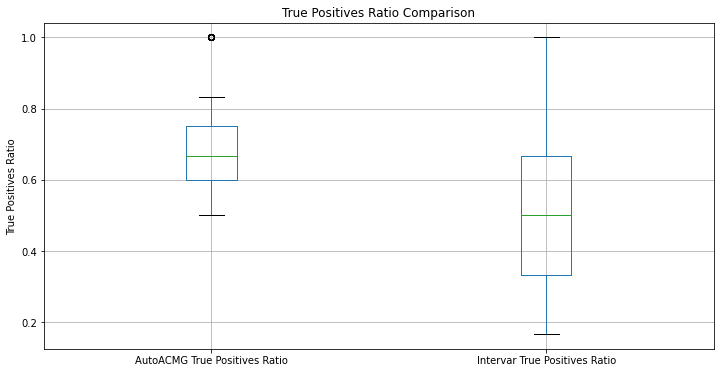

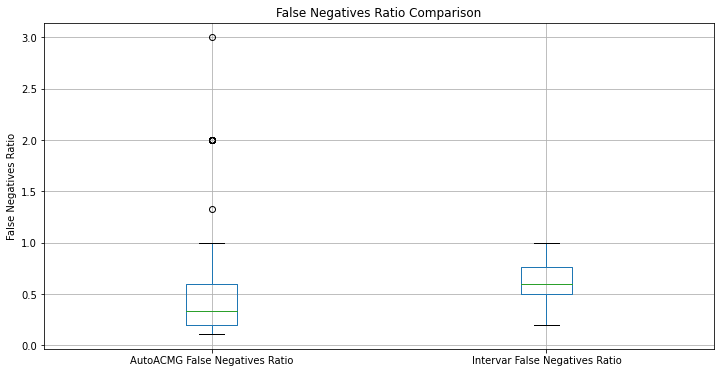

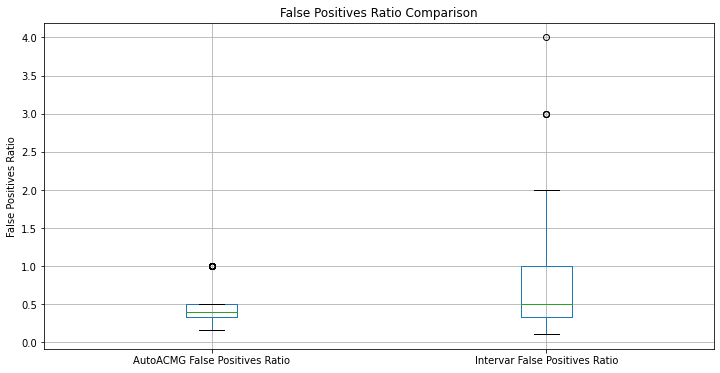

In [80]:
# Visualize the True Positives Ratio in Boxplot
plt.figure(figsize=(12, 6))
df[['AutoACMG True Positives Ratio', 'Intervar True Positives Ratio']].boxplot()
plt.ylabel('True Positives Ratio')
plt.title('True Positives Ratio Comparison')
plt.show()

# Visualize the False Negatives Ratio in Boxplot
plt.figure(figsize=(12, 6))
df[['AutoACMG False Negatives Ratio', 'Intervar False Negatives Ratio']].boxplot()
plt.ylabel('False Negatives Ratio')
plt.title('False Negatives Ratio Comparison')
plt.show()

# Visualize the False Positives Ratio in Boxplot
plt.figure(figsize=(12, 6))
df[['AutoACMG False Positives Ratio', 'Intervar False Positives Ratio']].boxplot()
plt.ylabel('False Positives Ratio')
plt.title('False Positives Ratio Comparison')
plt.show()

,Criteria,AutoACMG True Positives,AutoACMG False Negatives,AutoACMG False Positives,Intervar True Positives,Intervar False Negatives,Intervar False Positives
0,PP2,30,0,17,3,44,14
1,BP3,0,0,0,0,0,0
2,BP4,14,29,9,15,5,3
3,PM4,3,0,0,0,0,0
4,BP7,19,4,1,15,0,2
5,PS1,5,2,6,0,11,0
6,PVS1,23,1,3,4,4,0
7,BS2,12,1,7,4,16,13
8,PP3,49,6,19,67,4,31
9,PM1,36,63,9,45,0,64


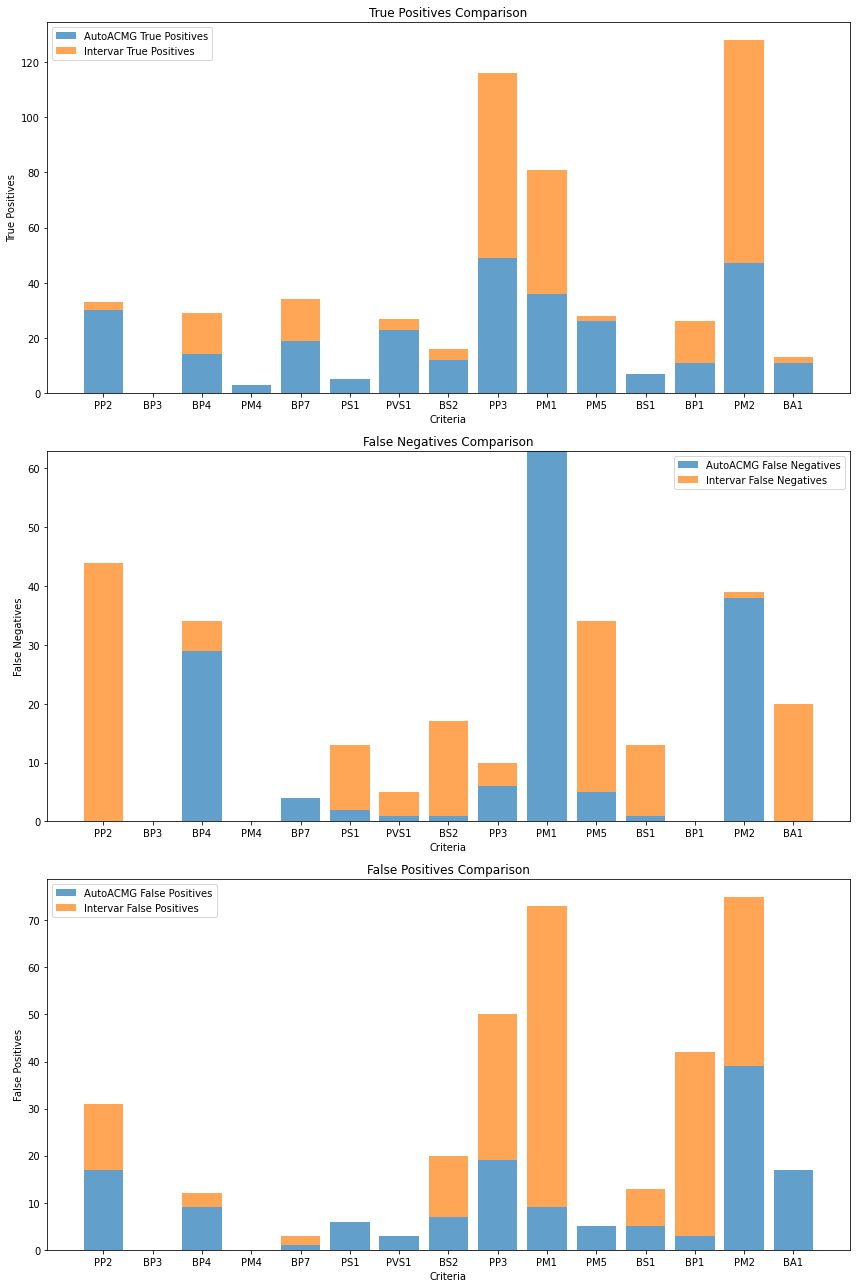

In [81]:
# Per-criteria analysis
#: List of all criteria
criteria = [
    "PVS1",
    "PS1",
    "PS2",
    "PS3",
    "PS4",
    "PM1",
    "PM2",
    "PM3",
    "PM4",
    "PM5",
    "PM6",
    "PP1",
    "PP2",
    "PP3",
    "PP4",
    "PP5",
    "BA1",
    "BS1",
    "BS2",
    "BS3",
    "BS4",
    "BP1",
    "BP2",
    "BP3",
    "BP4",
    "BP5",
    "BP6",
    "BP7",
]

#: Not implemented criteria
not_implemented = [
    "PS2",
    "PS3",
    "PS4",
    "PM3",
    "PM6",
    "PP1",
    "PP4",
    "PP5",
    "BS3",
    "BS4",
    "BP2",
    "BP5",
    "BP6",
]

# Initialize a dictionary to store the results
per_criteria_results = {
    "Criteria": list(set(criteria) - set(not_implemented)),
    "AutoACMG True Positives": [],
    "AutoACMG False Negatives": [],
    "AutoACMG False Positives": [],
    "Intervar True Positives": [],
    "Intervar False Negatives": [],
    "Intervar False Positives": [],
}

# Calculate the results for each criteria
for c in list(set(criteria) - set(not_implemented)):
    per_criteria_results["AutoACMG True Positives"].append(
        df["AutoACMG True Positives"].str.contains(c).sum()
    )
    per_criteria_results["AutoACMG False Negatives"].append(
        df["AutoACMG False Negatives"].str.contains(c).sum()
    )
    per_criteria_results["AutoACMG False Positives"].append(
        df["AutoACMG False Positives"].str.contains(c).sum()
    )
    per_criteria_results["Intervar True Positives"].append(
        df["Intervar True Positives"].str.contains(c).sum()
    )
    per_criteria_results["Intervar False Negatives"].append(
        df["Intervar False Negatives"].str.contains(c).sum()
    )
    per_criteria_results["Intervar False Positives"].append(
        df["Intervar False Positives"].str.contains(c).sum()
    )

# Create a DataFrame from the results
per_criteria_results_df = pd.DataFrame(per_criteria_results)
display(per_criteria_results_df)

# Export the results to a CSV file
per_criteria_results_df.to_csv("per_criteria_results.csv", index=False)

# Visualize the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

axs[0].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["AutoACMG True Positives"], alpha=0.7, label="AutoACMG True Positives")
axs[0].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["Intervar True Positives"], alpha=0.7, label="Intervar True Positives", bottom=per_criteria_results_df["AutoACMG True Positives"])
axs[0].set_xlabel("Criteria")
axs[0].set_ylabel("True Positives")
axs[0].set_title("True Positives Comparison")
axs[0].legend()

axs[1].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["AutoACMG False Negatives"], alpha=0.7, label="AutoACMG False Negatives")
axs[1].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["Intervar False Negatives"], alpha=0.7, label="Intervar False Negatives", bottom=per_criteria_results_df["AutoACMG False Negatives"])
axs[1].set_xlabel("Criteria")
axs[1].set_ylabel("False Negatives")
axs[1].set_title("False Negatives Comparison")
axs[1].legend()

axs[2].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["AutoACMG False Positives"], alpha=0.7, label="AutoACMG False Positives")
axs[2].bar(per_criteria_results_df["Criteria"], per_criteria_results_df["Intervar False Positives"], alpha=0.7, label="Intervar False Positives", bottom=per_criteria_results_df["AutoACMG False Positives"])
axs[2].set_xlabel("Criteria")
axs[2].set_ylabel("False Positives")
axs[2].set_title("False Positives Comparison")
axs[2].legend()

plt.tight_layout()
plt.show()

In [82]:
# Calculate summary statistics for per-criteria analysis
per_criteria_summary = {
    "Metric": ["Mean", "Standard Deviation"],
    "AutoACMG True Positives": [
        per_criteria_results_df["AutoACMG True Positives"].mean(),
        per_criteria_results_df["AutoACMG True Positives"].std(),
    ],
    "Intervar True Positives": [
        per_criteria_results_df["Intervar True Positives"].mean(),
        per_criteria_results_df["Intervar True Positives"].std(),
    ],
    "AutoACMG False Negatives": [
        per_criteria_results_df["AutoACMG False Negatives"].mean(),
        per_criteria_results_df["AutoACMG False Negatives"].std(),
    ],
    "Intervar False Negatives": [
        per_criteria_results_df["Intervar False Negatives"].mean(),
        per_criteria_results_df["Intervar False Negatives"].std(),
    ],
    "AutoACMG False Positives": [
        per_criteria_results_df["AutoACMG False Positives"].mean(),
        per_criteria_results_df["AutoACMG False Positives"].std(),
    ],
    "Intervar False Positives": [
        per_criteria_results_df["Intervar False Positives"].mean(),
        per_criteria_results_df["Intervar False Positives"].std(),
    ],
}

per_criteria_summary_df = pd.DataFrame(per_criteria_summary)

# Display summary statistics for per-criteria analysis
display(per_criteria_summary_df)

,Metric,AutoACMG True Positives,Intervar True Positives,AutoACMG False Negatives,Intervar False Negatives,AutoACMG False Positives,Intervar False Positives
0,Mean,19.533333,16.866667,10.000000,9.733333,9.333333,14.000000
1,Standard Deviation,15.384903,26.092874,18.589552,12.914370,10.244627,19.595918
